<a href="https://colab.research.google.com/github/dcreeder89/Heart-Failure-Prediction-Data-Analysis/blob/main/Reeder__Heart_Failure_Prediction_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction Data Analysis
- Christina Reeder
- Last updated: 19 January 2023

Goal of this project is to predict if a patient will contract a heart disease based on various factors. The dataset utilized is found [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). And the Attribute information for the dataset is below:

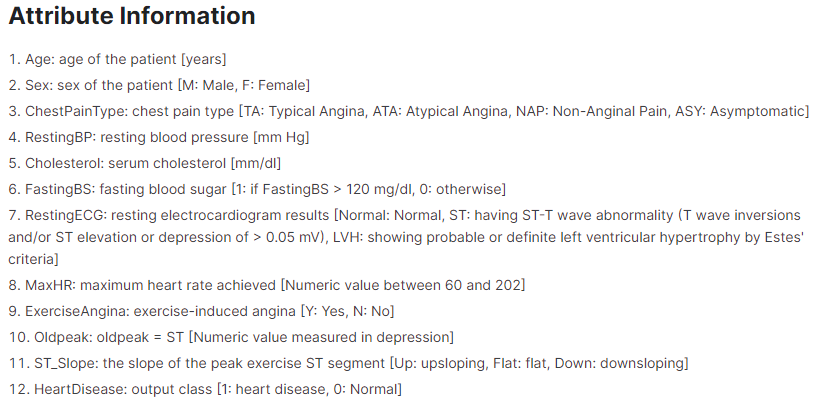

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer

In [2]:
## filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## Import and Examine Data

In [3]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRj-4vMvk8k0WT-Ayif1M_gTLOzojgQ7UP_ujcJRSChVDUUrjYNvXkQuHnZplDwKJ0Yqht5p8Ezkbiy/pub?gid=223378998&single=true&output=csv'
df = pd.read_csv(url)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Clean and Explore the Dataset

Tasks:
- Deleted unnecessary columns.
  - There are no unnecessary columns identified in this dataset. I believe that all columns can add to our machine learning algorithm. 
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. -Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
  - Completed with the generation of univariate visuals for numerical features. 
- Clearly commented all of your cleaning steps and described any decisions you made.
  - Completed amongst the other tasks.

### Delete duplicate rows

In [5]:
# count number of duplicate rows
df.duplicated().sum()

0

> There are no duplicate rows in this dataset.

### ID and Address Missing Values

In [6]:
# calculate sum of all missing values in the rows of the dataset
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

> There are no missing values in this dataset

### ID and Correct inconsistencies in categorical values

Categorical columns are:
- Sex
- ChestPainType
- FastingsBS (numerical values, but binary categories of either 1 or 0)
- RestingECG
- ExerciseAngina
- ST_Slope
- HeartDisease (numerical values, but binary categories of either 1 or 0)

In [7]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [8]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [9]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [10]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [11]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [12]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [13]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

> When comparing the value_counts() to the information provided in the Attribute Information on kaggle.com, there are no inconsistencies in any of the categorical columns.

### Produce univariate visuals for target and all features, and ID outliers

#### 'Age' column

> Boxplot

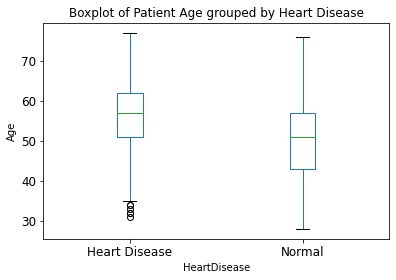

In [14]:
# copy dataframe and replace binary values with actual labels
age_df = df.copy()
age_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
age_df.boxplot('Age', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Age grouped by Heart Disease');
plt.ylabel('Age');

> The majority of patients with heart disease are a higher age range than those without heart disease. There is There is a larger spread of age in patients without heart disease, than in patients with it.

> There are outliers in the lower ages for the patients with heart disease. 

#### 'Sex' column

> Bar chart

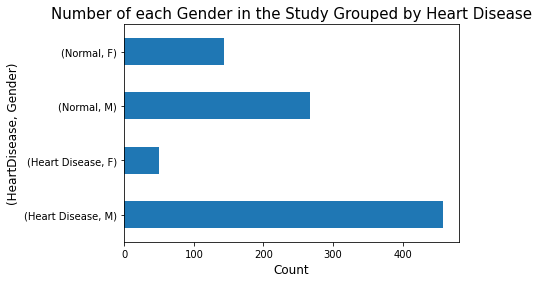

In [15]:
# copy dataframe and replace binary values with actual labels
sex_df = df.copy()
sex_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
sex_counts = sex_df.groupby('HeartDisease')['Sex'].value_counts()
# Plot counts of sexes
sex_counts.plot(kind='barh')
plt.title('Number of each Gender in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(HeartDisease, Gender)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> There are significantly more males in the heart failure prediction dataset than there are females. The diference in count between males and females without heart disease is less than the difference between those with heart disease. More males than females are diagnosed with heart disease. 

#### 'ChestPainType' column

> Bar chart

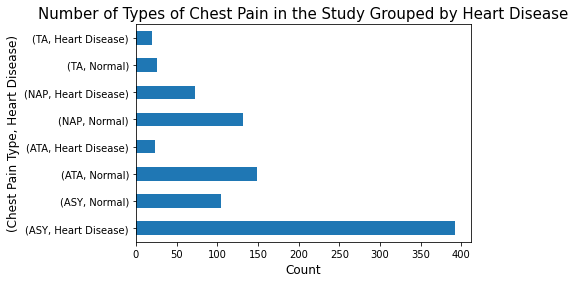

In [16]:
# copy dataframe and replace binary values with actual labels
cpain_df = df.copy()
cpain_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
cpain_counts = cpain_df.groupby('ChestPainType')['HeartDisease'].value_counts()
# Plot counts of sexes
cpain_counts.plot(kind='barh')
plt.title('Number of Types of Chest Pain in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Chest Pain Type, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> Chest pain types of TA, NAP and ATA have less patient without heart disease than with. Whereas, the ASY type chest pain has more patients with heart disease than without. 

#### 'RestingBP' column

> Boxplot

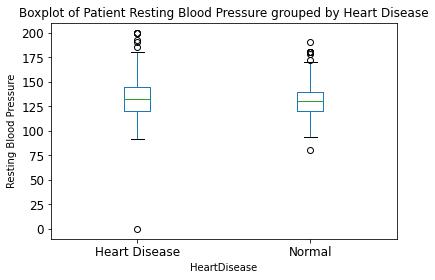

In [17]:
# copy dataframe and replace binary values with actual labels
bp_df = df.copy()
bp_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
bp_df.boxplot('RestingBP', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Resting Blood Pressure grouped by Heart Disease');
plt.ylabel('Resting Blood Pressure');

> The median resting blood pressure for patients with and without heart disease is approximately the same value. The standard range for resting blood pressure for patients with and without heart disease is comparable.

> There are outliers in the high and low resting blood pressure for patients with and without heart disease. The lowest resting blood pressure, and largest outlier, is seen in a patient with heart disease at a value of 0 (this is most likely an error in the data since no alive person can have a blood pressure of 0).

#### 'Cholesterol' column

> Boxplot

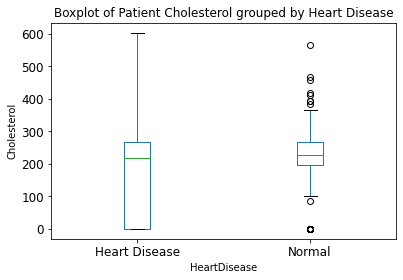

In [18]:
# copy dataframe and replace binary values with actual labels
chol_df = df.copy()
chol_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
chol_df.boxplot('Cholesterol', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Cholesterol grouped by Heart Disease');
plt.ylabel('Cholesterol');

> There is a larger range of cholesterols in patients with heart disease than in those without heart disease. The median value of cholesterol is approximately the same in patients with and without heart disease.

> There are no outliers in patients with heart disese, and outliers both greater and less than the standard deviations in patients without heart disease. 

#### 'FastingBS' column

> Bar chart

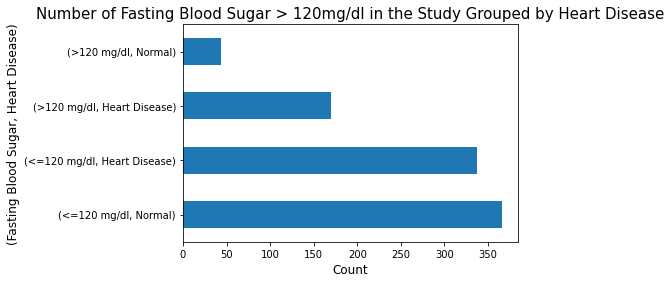

In [19]:
# copy dataframe and replace binary values with actual labels
fasting_df = df.copy()
fasting_df['FastingBS'].replace({1:'>120 mg/dl', 0:'<=120 mg/dl'}, inplace=True)
fasting_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
fasting_counts = fasting_df.groupby('FastingBS')['HeartDisease'].value_counts()
# Plot counts of sexes
fasting_counts.plot(kind='barh')
plt.title('Number of Fasting Blood Sugar > 120mg/dl in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Fasting Blood Sugar, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> In patients with Fasting Blood Sugar > 120 mg/dl, there is a higher number of patients with heart disease than without. Whereas, in patients with Fasting Blood Sugar <= 120 mg/dl there is a slightly higher number of patients without heart disease than with. The difference between patients with and without heart disease is less in patients with fasting bs <= 120 mg/dl than in patients with fasting bs > 120 mg/dl.

#### 'RestingECG' column

> Bar chart

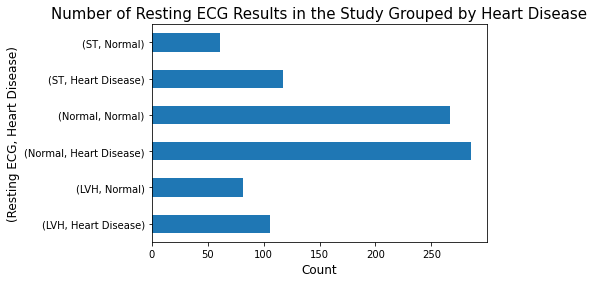

In [20]:
# copy dataframe and replace binary values with actual labels
ecg_df = df.copy()
ecg_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
ecg_counts = ecg_df.groupby('RestingECG')['HeartDisease'].value_counts()
# Plot counts of sexes
ecg_counts.plot(kind='barh')
plt.title('Number of Resting ECG Results in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Resting ECG, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> The differences in patients with and without heart disease is around the same for all Resting ECG results. In all resting ecg results there is a higher number with heart disease than without heart disease. 

#### 'MaxHR' column

> Boxplot

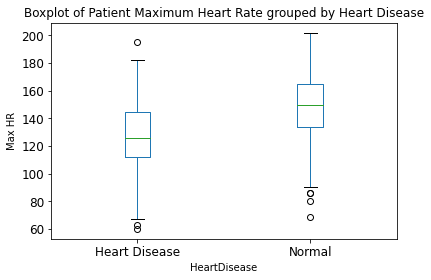

In [21]:
# copy dataframe and replace binary values with actual labels
hr_df = df.copy()
hr_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
hr_df.boxplot('MaxHR', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Maximum Heart Rate grouped by Heart Disease');
plt.ylabel('Max HR');

> Max heart rate in patients without heart disease is higher on average than in patients with heart disease. The spreads for maximum heart rate is approximately the same ammount in patients with and without heart disease. 

> There are outliers in the maximum heart rate of both patients with and without heart disease. 

#### 'ExerciseAngina' column

> Bar chart

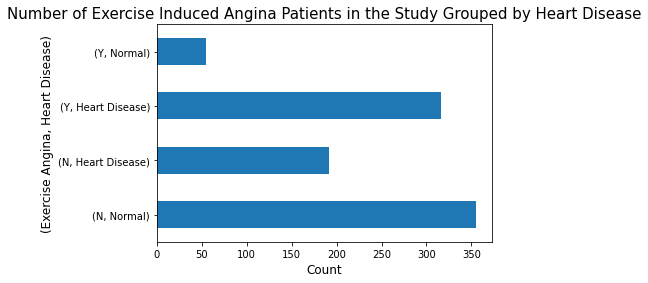

In [22]:
# copy dataframe and replace binary values with actual labels
angina_df = df.copy()
angina_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
angina_counts = angina_df.groupby('ExerciseAngina')['HeartDisease'].value_counts()
# Plot counts of sexes
angina_counts.plot(kind='barh')
plt.title('Number of Exercise Induced Angina Patients in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(Exercise Angina, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> There is a higher number of patients with heart disease in patients with exercise induced angina. Whereas there is a higher number of patiens without heart disease in patients without exercise induced angina. Therefore, this can be a possible indicator of heart disease in patients. 

#### 'Oldpeak' column

> Boxplot

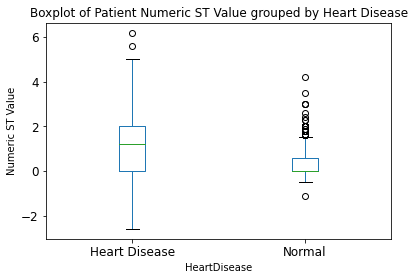

In [23]:
# copy dataframe and replace binary values with actual labels
peak_df = df.copy()
peak_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# display boxplot
peak_df.boxplot('Oldpeak', by='HeartDisease',
           fontsize=12,
           grid=False);
plt.suptitle('');
plt.title('Boxplot of Patient Numeric ST Value grouped by Heart Disease');
plt.ylabel('Numeric ST Value');

> There is a large variation in the Numeric ST value for patients with heart disease. The highest ST value in patients without heart disease (within the standard deviations) is lower than the median ST value in those with heart disease.

> There are many outliers in ST value for patients without heart disease since the rest of the data is very tightly grouped (this could lead to errors in our ML model later). There are only a couple outliers in the patients with heart disease. 

#### 'ST_Slope' column

> Bar chart



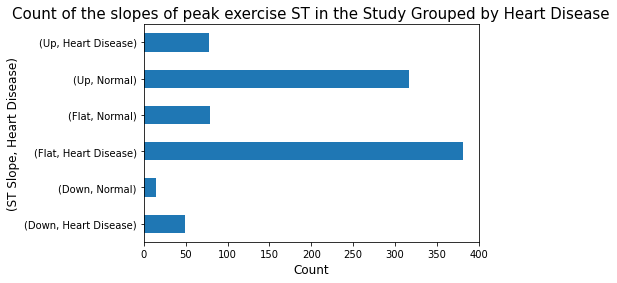

In [24]:
# copy dataframe and replace binary values with actual labels
st_df = df.copy()
st_df['HeartDisease'].replace({1:'Heart Disease',0:'Normal'}, inplace=True)
# Count number of each sex
st_counts = st_df.groupby('ST_Slope')['HeartDisease'].value_counts()
# Plot counts of sexes
st_counts.plot(kind='barh')
plt.title('Count of the slopes of peak exercise ST in the Study Grouped by Heart Disease', fontsize=15)
plt.ylabel('(ST Slope, Heart Disease)', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

> Patients with a peak exercise ST segment slope that is flat or down have higher rates of heart disease than those with an upward slope. The patients with a flat slope have the highest ratio of heart disease to no heart disease. And the patients with a upward slope have the lowest ratio of heart disease to no heart disease. 

## Visualizations Exploration

### Heatmap of correlations

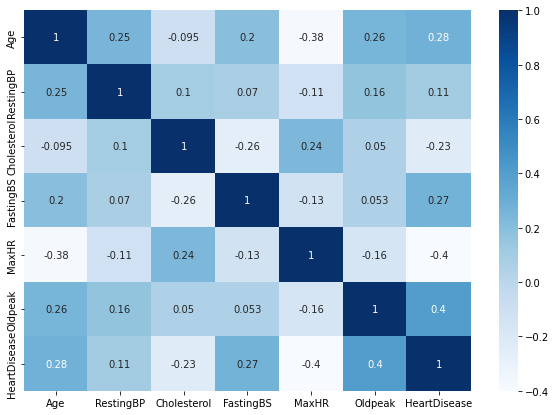

In [25]:
# calculate correlation coefficients 
corr = df.corr()
# produce heatmap with correlation displayed
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='Blues', annot=True);

The strongest correlations between features are seen between the old peak and the risk for heart disease as well as between max heart rate and the risk for heart disease., though these are still only a moderate correlation of +/- 0.4. Another moderate correlation is seen between maximum heart rate and the age of the patient. No other features in this dataset have a correlation above +/- 0.3.

### How does the max heart rate change with age?

> I am going to group ages into bins of 10 years so the plot isn't as cluttered. (Code found on [stack overflow](https://stackoverflow.com/questions/21441259/pandas-groupby-range-of-values))

In [26]:
# save a copy of the dataframe so we don't corrupt our dataset
df1 = df.copy()
# set bin limits and group names for the ages
bins = [0, 30, 40, 50, 60, 70, 100]
group_names = ['< 30', '30-39','40-49','50-59','60-69','> 70']
# create a new column with the ages grouped into bins of 10 years
df1['AgeGroups'] = pd.cut(df['Age'], bins, labels=group_names)

In [27]:
hr_mean = df1.groupby('AgeGroups')['MaxHR'].mean()
hr_mean

AgeGroups
< 30     177.400000
30-39    155.056818
40-49    144.757848
50-59    134.291339
60-69    125.609137
> 70     119.500000
Name: MaxHR, dtype: float64

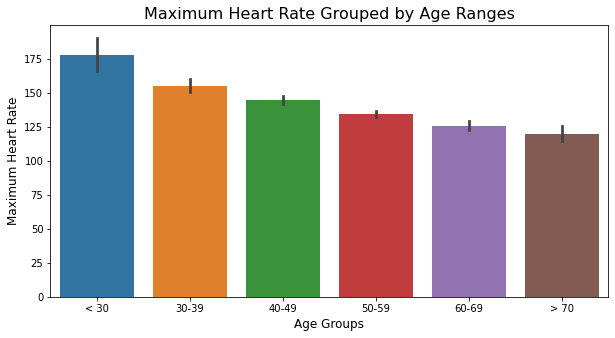

In [28]:
# Plot the barplot of age groups vs. heartrate
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df1, x='AgeGroups', y='MaxHR');
ax.set_title('Maximum Heart Rate Grouped by Age Ranges', fontsize=16);
ax.set_xlabel('Age Groups', fontsize=12);
ax.set_ylabel('Maximum Heart Rate', fontsize=12);

The visualization above shows that the average value for the maximum heart rate of the patients decreases as the patient's age increases. Maximum heart rate is a measure of the maximum heart rate the patient was able to achieve, and there is a definate correlation between the age of the patient and this heart rate. 

### How does age range effect percent chance for heart disease?

In [29]:
disease_mean = df1.groupby('AgeGroups')['HeartDisease'].mean()
disease_mean*100

AgeGroups
< 30      0.000000
30-39    36.363636
40-49    41.704036
50-59    58.267717
60-69    73.604061
> 70     66.666667
Name: HeartDisease, dtype: float64

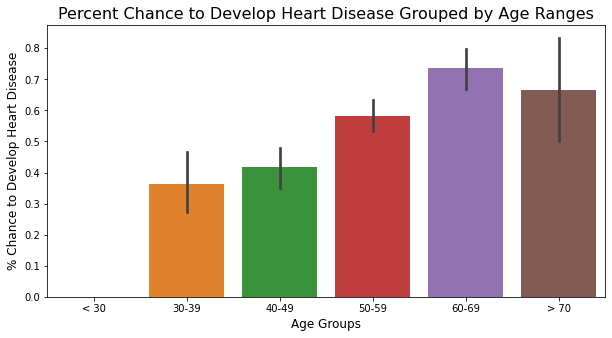

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df1, x='AgeGroups', y='HeartDisease');
ax.set_title('Percent Chance to Develop Heart Disease Grouped by Age Ranges', fontsize=16);
ax.set_xlabel('Age Groups', fontsize=12);
ax.set_ylabel('% Chance to Develop Heart Disease', fontsize=12);

The visualization above shows that the percentage risk for a heart disease in patients increases with time in an age range of 30 to 69 years. The risk then decreases on average when the patient is above 70 years old. 

### Age Groups and sex vs. chance for heart disease

In [31]:
disease_sex_mean = df1.groupby(['AgeGroups','Sex'])['HeartDisease'].mean()
disease_sex_mean*100

AgeGroups  Sex
< 30       F       0.000000
           M       0.000000
30-39      F      21.052632
           M      40.579710
40-49      F      12.068966
           M      52.121212
50-59      F      28.571429
           M      64.951768
60-69      F      46.153846
           M      80.379747
> 70       F      16.666667
           M      83.333333
Name: HeartDisease, dtype: float64

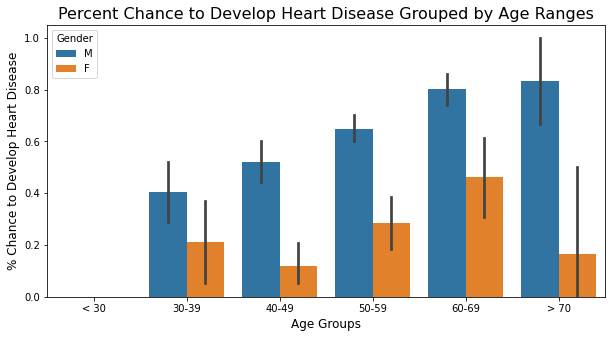

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df1, x='AgeGroups', y='HeartDisease', hue='Sex');
ax.set_title('Percent Chance to Develop Heart Disease Grouped by Age Ranges', fontsize=16);
ax.set_xlabel('Age Groups', fontsize=12);
ax.set_ylabel('% Chance to Develop Heart Disease', fontsize=12);
ax.legend(loc='upper left', title='Gender');

There is a significantly higher percent chance for male patients to develop a heart disease than female patients. The percent chance to develop heart disease increases as the age of the male patients increases. However, the chance of heart disease is highest in females in the age range of 60-69 and lowest in females in the age range of 40-49. 

### Maximum HR groups vs percent chance for heart disease

In [33]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [34]:
# save a copy of the dataframe so we don't corrupt our dataset
df2 = df.copy()
# set bin limits and group names for the ages
bins = [0, 75, 100, 125, 150, 175, 200, 500]
group_names = ['< 75', '75-99','100-124','125-149','150-174','175-199', '> 200']
# create a new column with the ages grouped into bins of 10 years
df2['HRGroups'] = pd.cut(df['MaxHR'], bins, labels=group_names)

In [35]:
hr_disease_mean = df2.groupby('HRGroups')['HeartDisease'].mean()
hr_disease_mean*100

HRGroups
< 75       88.888889
75-99      77.631579
100-124    77.731092
125-149    55.520505
150-174    31.858407
175-199    15.686275
> 200       0.000000
Name: HeartDisease, dtype: float64

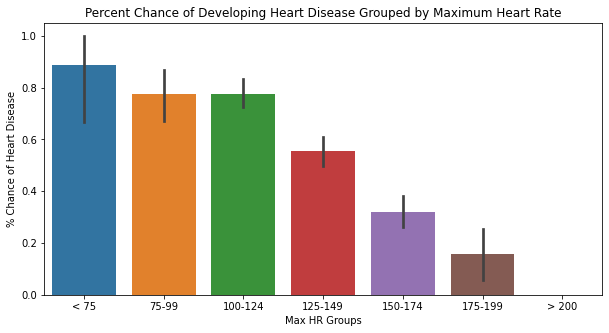

In [36]:
# Plot the barplot of age groups vs. heartrate
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df2, x='HRGroups', y='HeartDisease');
ax.set_title('Percent Chance of Developing Heart Disease Grouped by Maximum Heart Rate', fontsize=12);
ax.set_xlabel('Max HR Groups', fontsize=10);
ax.set_ylabel('% Chance of Heart Disease', fontsize=10);

This visualization shows that as the maximum heartrate the patient is able to achieve increases, the risk of heart disease decreases. This means that hearts that are able to achieve higher beats per minute are on average healthier than those that are not able. 

#### Combine this with the Max HR v Age Range visual

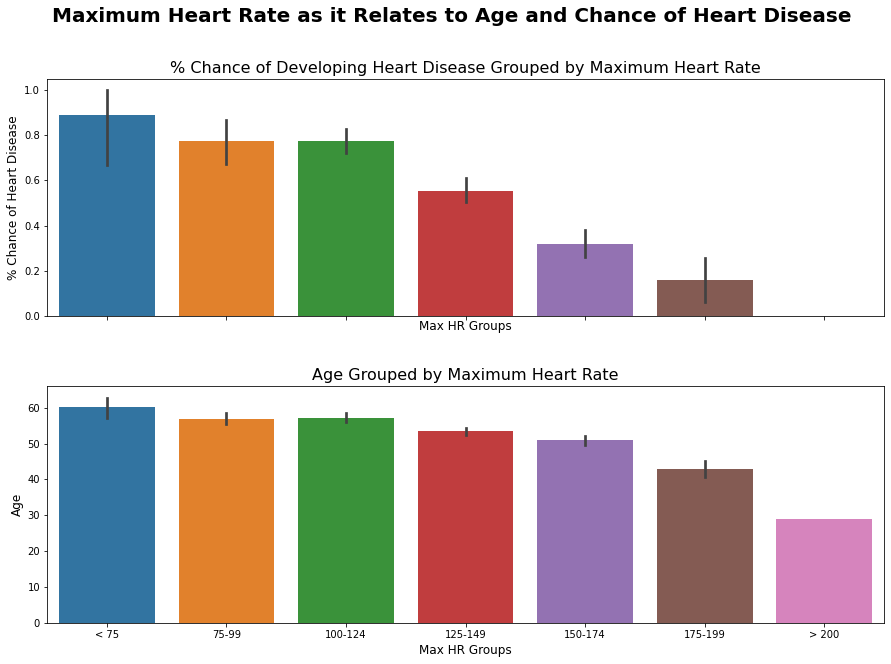

In [76]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Maximum Heart Rate as it Relates to Age and Chance of Heart Disease', fontsize=20,
             fontweight='bold')
ax[0] = sns.barplot(ax = ax[0], data=df2, x='HRGroups', y='HeartDisease');
ax[0].set_title('% Chance of Developing Heart Disease Grouped by Maximum Heart Rate', fontsize=16);
ax[0].set_xlabel('Max HR Groups', fontsize=12);
ax[0].set_ylabel('% Chance of Heart Disease', fontsize=12);

ax[1] = sns.barplot(ax = ax[1], data=df2, x='HRGroups', y='Age');
ax[1].set_title('Age Grouped by Maximum Heart Rate', fontsize=16);
ax[1].set_xlabel('Max HR Groups', fontsize=12);
ax[1].set_ylabel('Age', fontsize=12);

## Final Visualizations

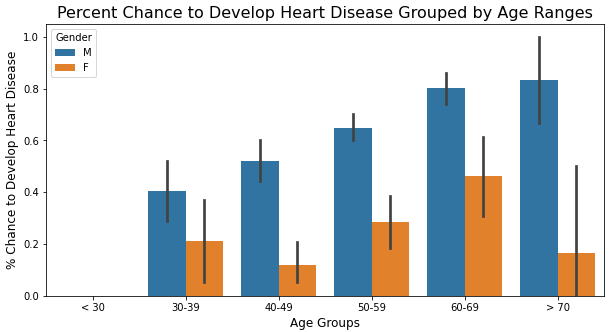

There is a significantly higher percent chance for male patients to develop a heart disease than female patients. The percent chance to develop heart disease increases as the age of the male patients increases. However, the chance of heart disease is highest in females in the age range of 60-69 and lowest in females in the age range of 40-49. 

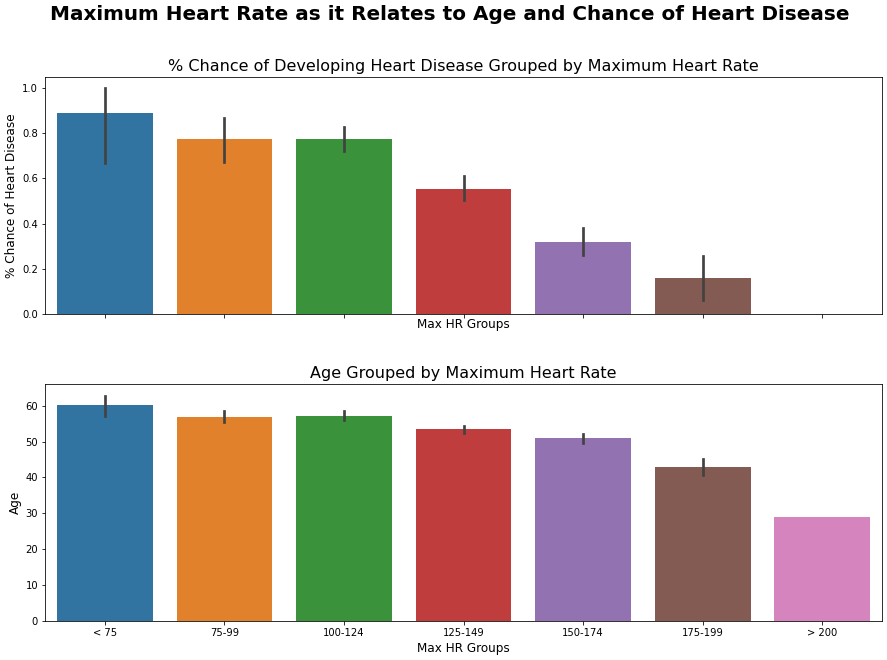

The top plot shows that the chance a patient will develop a heart disease decreases as the maximum heart rate achieved by that patient increases, meaning that the faster the heart is able to beat correlates to how healthy that heart is. The bottom plot shows that the maximum heart rate achieved by a patient decreases with the age of the patient. This leads me to the conclusion that older patients are at a higher risk for heart disease than younger patients on average. 